## Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


### Loading data using pandas.read_csv()

In [2]:
data = pd.read_csv("./survey_results_public.csv")
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


## Basic Info about DataFrame

In [3]:
# Print the shape of the dataframe
print("Shape of the dataframe is: ", data.shape, end="\n\n")

# Print the number of columns in the dataframe
print("No.of columns in the dataframe is: ", list(data.columns), end="\n\n")

# Print the data types of each column
print("Data types of columns is: ", [data[i].dtype for i in data.columns], end="\n\n")

# Print the statistics of the numerical columns
print("Understanding the statistics of numerical columns: ", end="\n\n")
print(data.describe())

# Print information about the complete dataframe
print("Information about the complete dataframe: ", end="\n\n")
print(data.info())

Shape of the dataframe is:  (89184, 84)

No.of columns in the dataframe is:  ['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith

we can observe some missing values in the dataset from above information

---

### Confirm the missing values using isnull()

In [4]:
data.isnull().sum()

ResponseId                 0
Q120                       0
MainBranch                 0
Age                        0
Employment              1286
                       ...  
ProfessionalTech       47401
Industry               52410
SurveyLength            2699
SurveyEase              2630
ConvertedCompYearly    41165
Length: 84, dtype: int64

- Missings values are there.


---

#### **we dont need 84 columns to train our model, so we need to select the most relavent columns for our analysis**
#### ***But for analysis of data, we need more columns than training the model. so, first we analyze the data and find the valuable insights then train the ml model based on relavent data to get accurate results***

First of all, Lets the columns which we have:

In [5]:
# If we have more columns pd.head shows our data as a subset for our brevity... if we want to see all the columns then we need to use pd.set_options 
# To display all the columns, you can use the following code:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

#### **Let's remove the Non-relavent rows which is not useful for the further analysis**

In [7]:
data = data.drop(columns=['ResponseId','Q120','LearnCode','LearnCodeOnline','LearnCodeCoursesCert','PurchaseInfluence','TechList','BuyNewTool','Currency','CompTotal',
                          'AINextVery different','AINextNeither different nor similar','AINextSomewhat similar'	,'AINextVery similar','AINextSomewhat different','TBranch',
                          'ICorPM','NEWSOSites','SOVisitFreq','SOAccount','SOPartFreq','SOComm','SOAI','AISelect','AISent','AIAcc','AIBen','AIToolInterested in Using',
                          'AIToolCurrently Using','AIToolNot interested in Using','Knowledge_1','Knowledge_2','Knowledge_3','Knowledge_4','Knowledge_5','Knowledge_6','Knowledge_7',
                          'Knowledge_8','Frequency_1','Frequency_2','Frequency_3','TimeSearching','TimeAnswering','SurveyLength','SurveyEase'])


In [8]:
data.head()

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,WorkExp,ProfessionalTech,Industry,ConvertedCompYearly
0,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,United States of America,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,10.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",285000.0
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",United States of America,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Cargo;Kubernetes;Nix,Emacs;Helix,Emacs;Helix,MacOS;Other Linux-based,MacOS;Other Linux-based,Markdown File;Stack Overflow for Teams,Markdown File,Microsoft Teams;Slack;Zoom,Slack;Zoom,NaN,NaN,NaN,NaN,23.0,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",250000.0
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,United States of America,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,NaN,NaN,Homebrew;npm;Vite;Webpack;Yarn,Homebrew;npm;Vite,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,IntelliJ IDEA;Vim;WebStorm,iOS;iPadOS;MacOS,iOS;iPadOS;MacOS,Jira,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Discord;Google Meet;Slack;Zoom,NaN,NaN,NaN,NaN,7.0,Automated testing;Continuous integration (CI) ...,NaN,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,Philippines,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      89184 non-null  object 
 1   Age                             89184 non-null  object 
 2   Employment                      87898 non-null  object 
 3   RemoteWork                      73810 non-null  object 
 4   CodingActivities                73764 non-null  object 
 5   EdLevel                         87973 non-null  object 
 6   YearsCode                       87435 non-null  object 
 7   YearsCodePro                    66136 non-null  object 
 8   DevType                         76872 non-null  object 
 9   OrgSize                         65043 non-null  object 
 10  Country                         87973 non-null  object 
 11  LanguageHaveWorkedWith          87140 non-null  object 
 12  LanguageWantToWorkWith          

In [10]:
data.isnull().sum()/data.shape[0]*100

MainBranch                         0.000000
Age                                0.000000
Employment                         1.441963
RemoteWork                        17.238518
CodingActivities                  17.290097
EdLevel                            1.357867
YearsCode                          1.961114
YearsCodePro                      25.843201
DevType                           13.805167
OrgSize                           27.068757
Country                            1.357867
LanguageHaveWorkedWith             2.291891
LanguageWantToWorkWith             9.502826
DatabaseHaveWorkedWith            17.658997
DatabaseWantToWorkWith            31.701875
PlatformHaveWorkedWith            28.655364
PlatformWantToWorkWith            42.469501
WebframeHaveWorkedWith            24.943936
WebframeWantToWorkWith            36.377601
MiscTechHaveWorkedWith            36.065886
MiscTechWantToWorkWith            47.470398
ToolsTechHaveWorkedWith           12.670434
ToolsTechWantToWorkWith         

---

# **UNI-VARIATE ANALYSIS**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sb

def Univariate_Analysis(data, dataframe, column,fig_size=(20,6)):
    total_count = data[column].notnull().sum()
    dataframe['percentage'] = round((dataframe['count'] / total_count) * 100, 2)
    
                
    print("This the graph of {}, We got {} response out of {}".format(column, total_count, data.shape[0]))
    print("Based on these responses")

    print("""Choose the option: 
          1) Percentages
          2) Responses
          """)
    option = int(input("Enter 1 or 2: "))

    if option == 1:
        plt.figure(figsize=fig_size)
        ax = sb.barplot(x=dataframe['count'], y=dataframe[column], color='crimson')
        # Iterate over each bar to add count labels
        for index, row in dataframe.iterrows():
            ax.text(row['count'], index, f"{row['percentage']}%", color='#3c3e40', fontweight='bold')
        # Set plot title and labels
        plt.title("Graph showing percentage distribution of " + str(column), fontdict={'fontsize': 25}, color='#3c3e40', fontweight="bold")
        # plt.xlabel("Count", fontweight="bold", fontsize=18, color='#3c3e40')
        # plt.ylabel(column, fontweight="bold", fontsize=18, color='#3c3e40')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.tick_params(axis='y', length=0)  # Remove ticks on y-axis
        ax.tick_params(axis='x', length=0)  # Remove ticks on x-axis
        ax.set_xticklabels([])  # Remove x-axis labels
        plt.show()
    elif option == 2: 
        plt.figure(figsize=fig_size)
        ax = sb.barplot(x=dataframe['count'], y=dataframe[column], color='crimson')
        # Iterate over each bar to add count labels
        for index, row in dataframe.iterrows():
            ax.text(row['count'], index, str(row['count']), color='#3c3e40', fontweight='bold')   
        # Set plot title and labels
        plt.title("Graph showing Responses distribution of " + str(column), fontdict={'fontsize': 25}, color='#3c3e40', fontweight="bold")
        # plt.xlabel("Count", fontweight="bold", fontsize=18, color='#3c3e40')
        # plt.ylabel(column, fontweight="bold", fontsize=18, color='#3c3e40')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.tick_params(axis='y', length=0)  # Remove ticks on y-axis
        ax.tick_params(axis='x', length=0)  # Remove ticks on x-axis
        ax.set_xticklabels([])  # Remove x-axis labels
        plt.show() 
    else:
        print("Invalid Option! Please enter either")

# Example usage:
# Assuming you have a DataFrame 'df' and want to perform univariate analysis on a column 'Age'
# Univariate_Analysis(df, df['Age'].value_counts().reset_index(), 'Age')


---

## ***MainBranch***

This the graph of MainBranch, We got 89184 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


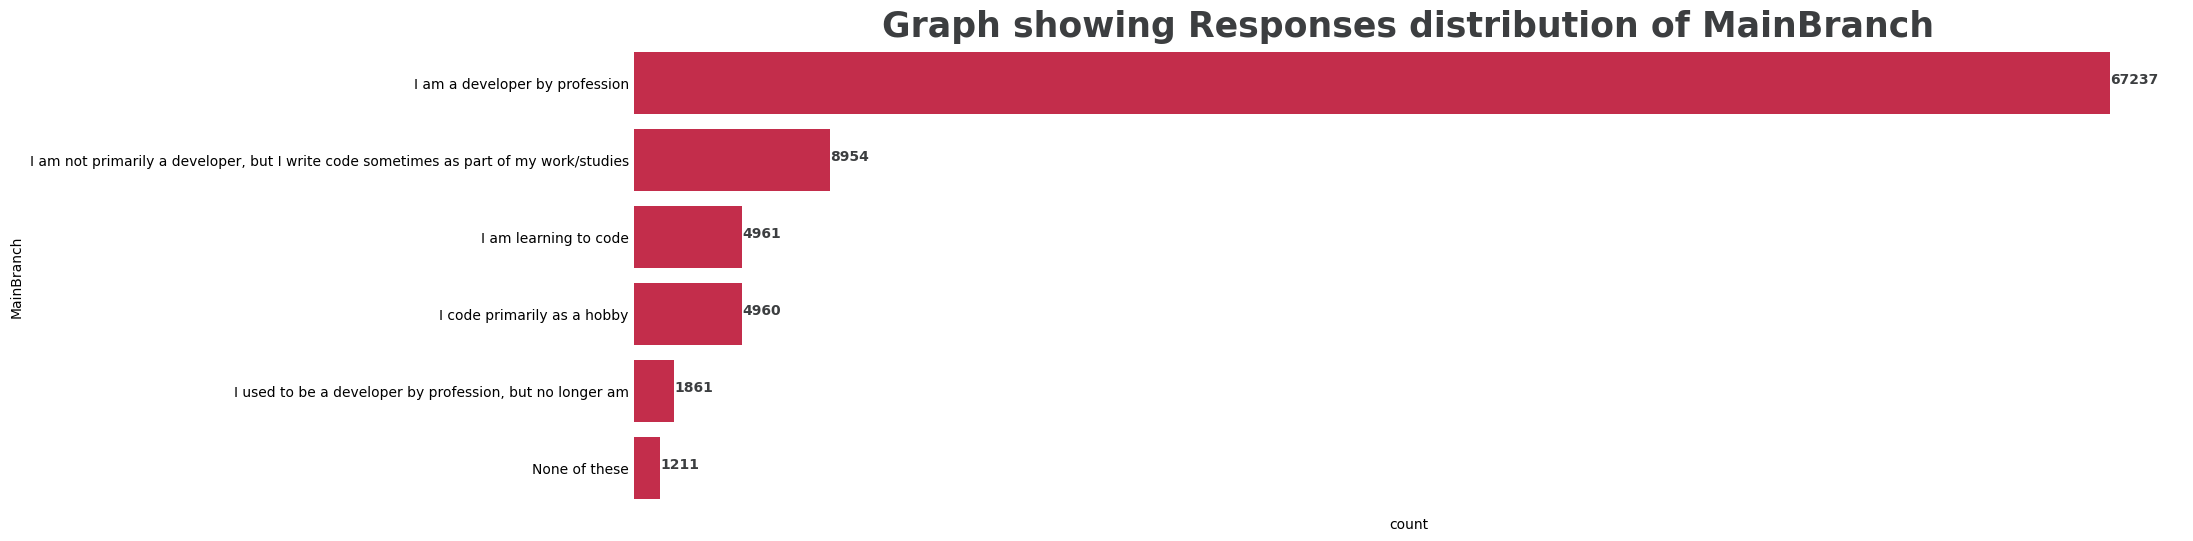

In [13]:
MainBranch_Data = data['MainBranch'].value_counts().reset_index()
Univariate_Analysis(data,MainBranch_Data,'MainBranch')

---

## ***Age***

In [14]:
Age_Data = data['Age'].value_counts().reset_index()
Age_Data

,Age,count
0,25-34 years old,33247
1,35-44 years old,20532
2,18-24 years old,17931
3,45-54 years old,8334
4,Under 18 years old,4128
5,55-64 years old,3392
6,65 years or older,1171
7,Prefer not to say,449


This the graph of Age, We got 89184 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


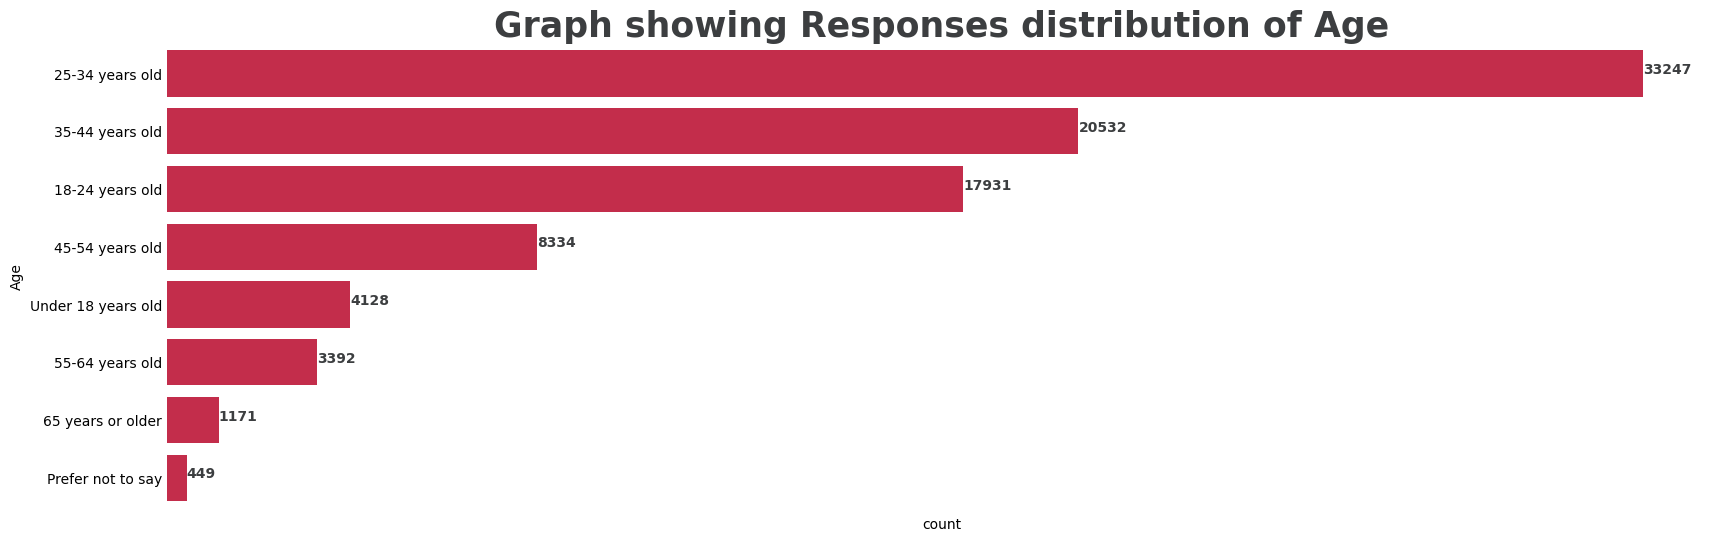

In [15]:
Univariate_Analysis(data,Age_Data,'Age')

---

## ***Employment***

In [16]:
Employment_data =data['Employment'].value_counts().reset_index()
Employment_data

,Employment,count
0,"Employed, full-time",53748
1,"Student, full-time",7430
2,"Independent contractor, freelancer, or self-em...",7076
3,"Employed, full-time;Independent contractor, fr...",4354
4,"Not employed, but looking for work",2553
...,...,...
101,"Employed, full-time;Independent contractor, fr...",1
102,"Employed, full-time;Independent contractor, fr...",1
103,"Employed, full-time;Independent contractor, fr...",1
104,"Employed, full-time;Independent contractor, fr...",1


In [17]:
data['EmploymentType'] = data['Employment'].str.split(';').apply(lambda x: x if isinstance(x, list) else [])
df_exploded = data.explode('EmploymentType')
# Remove NaN values
df_exploded = df_exploded.dropna(subset=['EmploymentType'])

# Count the occurrences of each search engi
Employment_counts = df_exploded['EmploymentType'].value_counts().reset_index()
Employment_counts.columns = ['Employment', 'count']
Employment_counts

,Employment,count
0,"Employed, full-time",60899
1,"Independent contractor, freelancer, or self-em...",13988
2,"Student, full-time",11768
3,"Employed, part-time",5029
4,"Not employed, but looking for work",4178
5,"Student, part-time",3390
6,"Not employed, and not looking for work",1380
7,Retired,737
8,I prefer not to say,549


This the graph of Employment, We got 87898 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


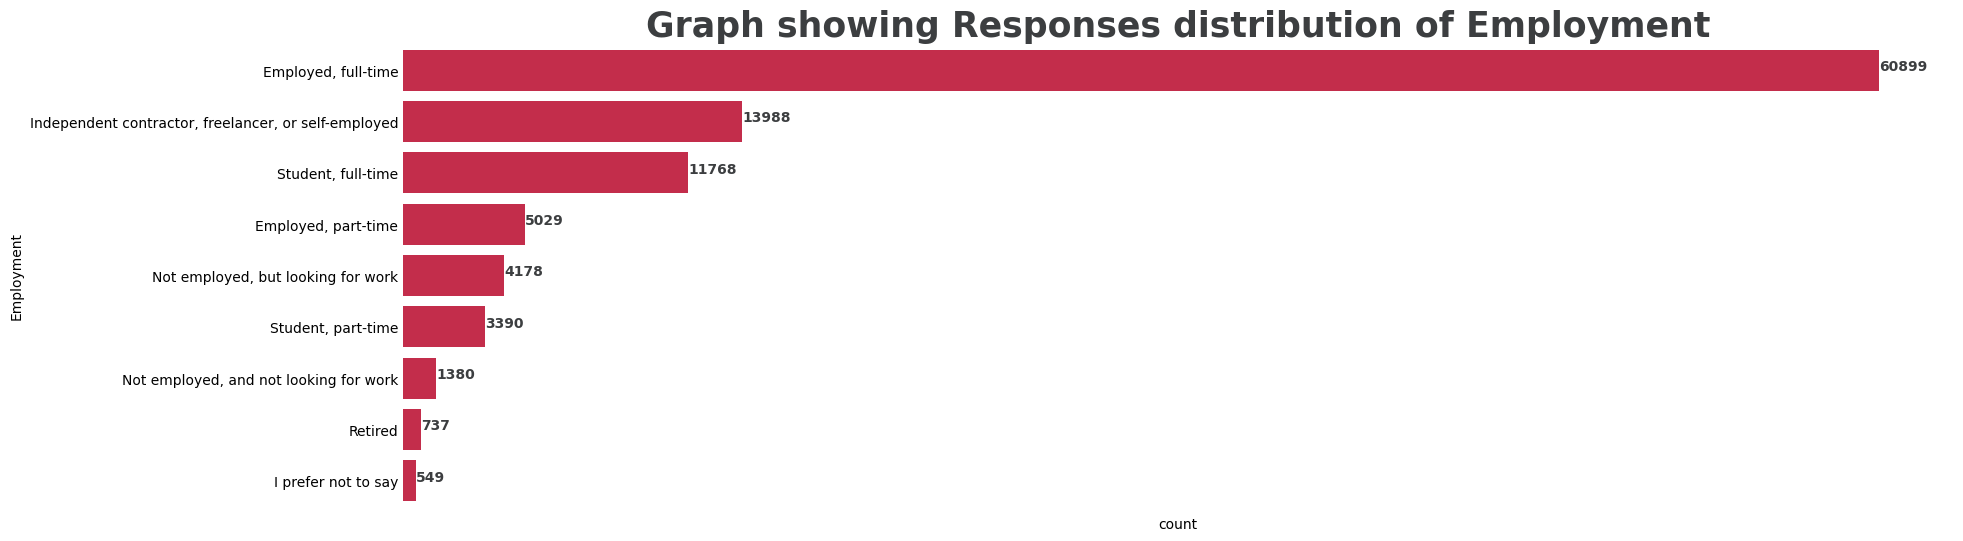

In [18]:

Univariate_Analysis(data,Employment_counts,'Employment')

---

## ***Remote Work***

In [19]:
Remote_work_data = data['RemoteWork'].value_counts().reset_index()

This the graph of RemoteWork, We got 73810 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


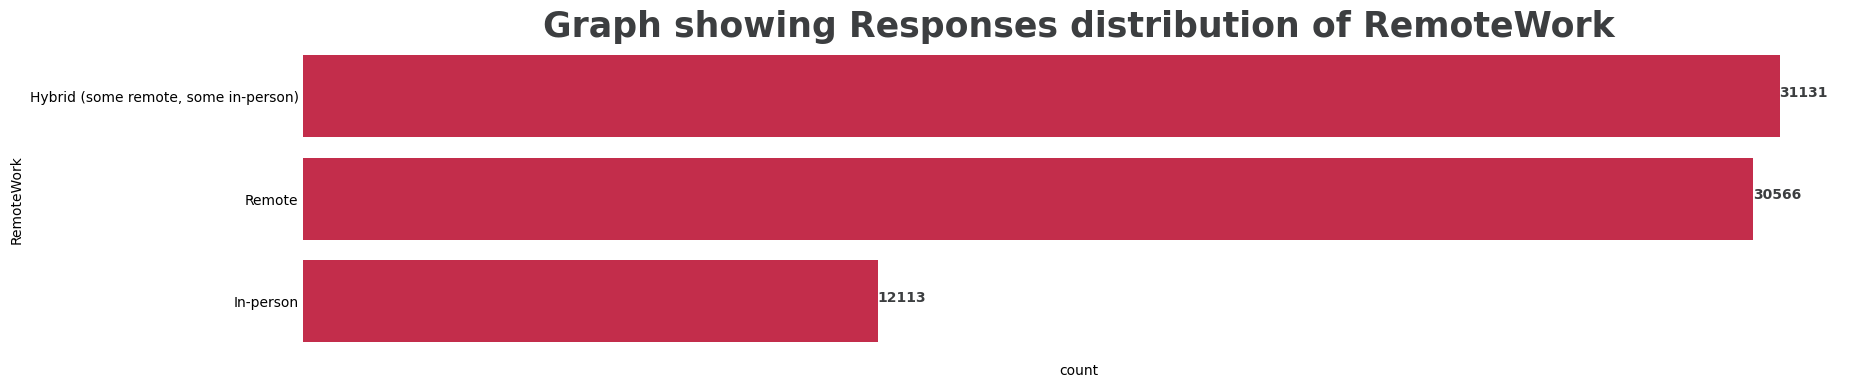

In [20]:

Univariate_Analysis(data,Remote_work_data,'RemoteWork',fig_size=(20,4))

----

## **Coding Activites**

In [21]:
data['CodingActivities'].value_counts().reset_index()

,CodingActivities,count
0,Hobby,15308
1,I don’t code outside of work,8809
2,Hobby;Professional development or self-paced l...,8232
3,Hobby;Contribute to open-source projects,5363
4,Professional development or self-paced learnin...,3920
...,...,...
111,Hobby;Bootstrapping a business;Freelance/contr...,1
112,Contribute to open-source projects;Professiona...,1
113,Hobby;Contribute to open-source projects;Boots...,1
114,Hobby;Contribute to open-source projects;Boots...,1


In [22]:
data['Coding'] = data['CodingActivities'].str.split(';').apply(lambda x: x if isinstance(x, list) else [])
df_exploded = data.explode('Coding')
# Remove NaN values
df_exploded = df_exploded.dropna(subset=['Coding'])

# Count the occurrences of each search engi
CodingActivity_counts = df_exploded['Coding'].value_counts().reset_index()
CodingActivity_counts.columns = ['CodingActivities', 'count']
CodingActivity_counts

,CodingActivities,count
0,Hobby,51942
1,Professional development or self-paced learnin...,26957
2,Contribute to open-source projects,18231
3,Freelance/contract work,14258
4,Bootstrapping a business,10293
5,I don’t code outside of work,8809
6,School or academic work,8636
7,Other (please specify):,1182


This the graph of CodingActivities, We got 73764 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


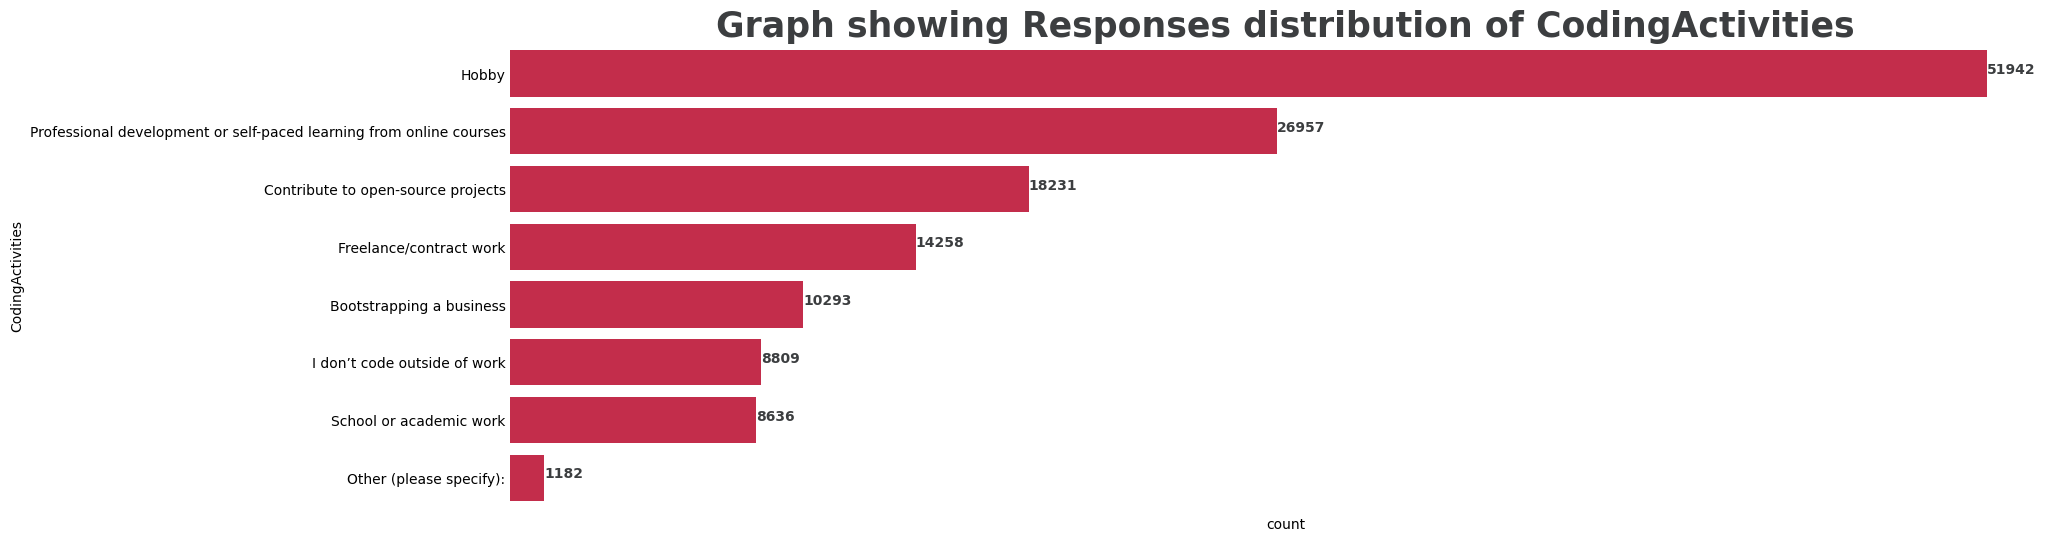

In [23]:
Univariate_Analysis(data,CodingActivity_counts,'CodingActivities')

---


## **Education Level**

In [24]:
Edu_level_data = data['EdLevel'].value_counts().reset_index()

This the graph of EdLevel, We got 87973 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


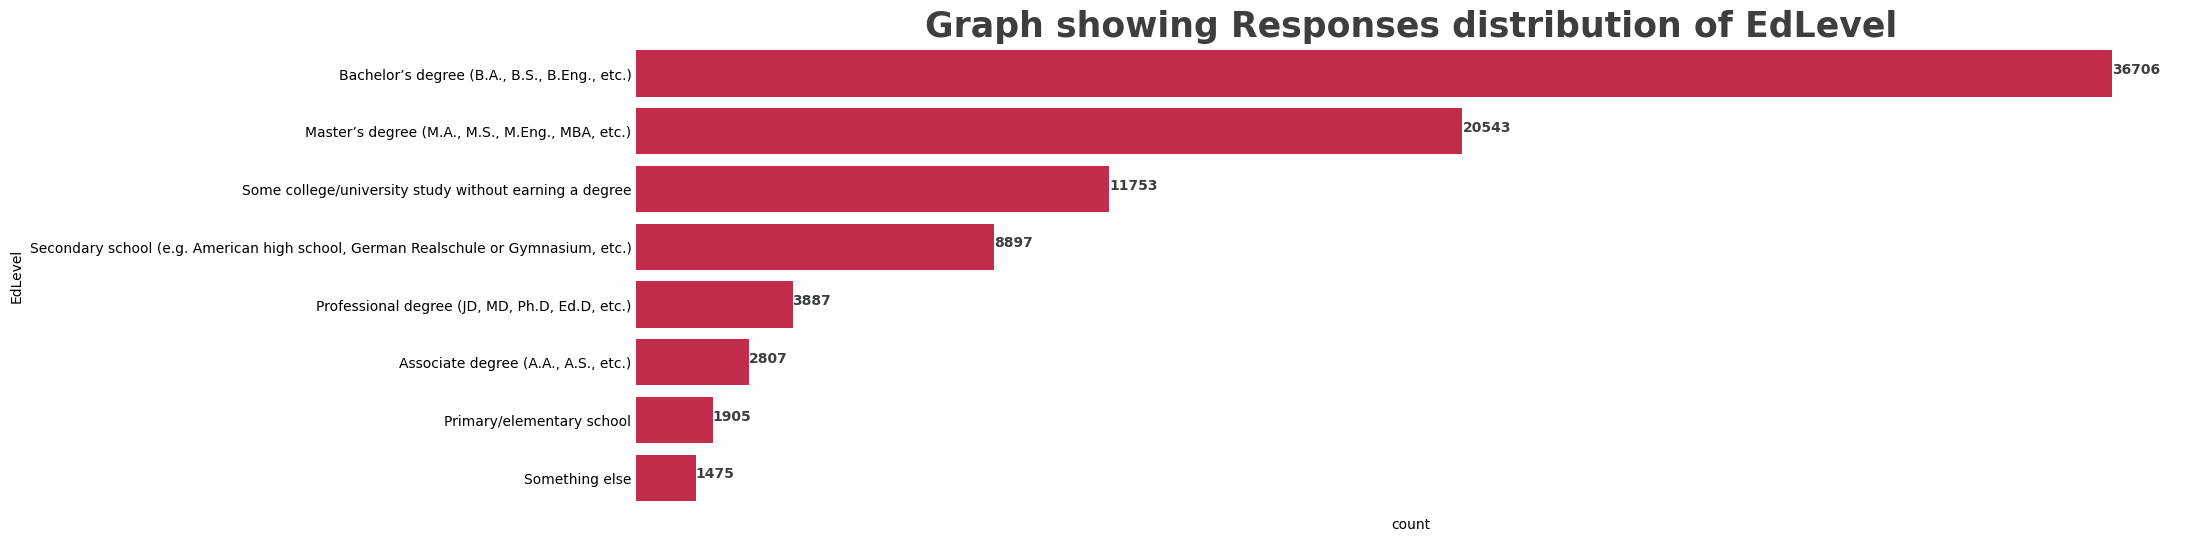

In [25]:
Univariate_Analysis(data,Edu_level_data,'EdLevel')

In [26]:
# column_list = ['YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
#        'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
#        'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
#        'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
#        'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
#        'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
#        'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
#        'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
#        'OpSysPersonal use', 'OpSysProfessional use',
#        'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
#        'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
#        'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
#        'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'WorkExp',
#        'ProfessionalTech', 'Industry', 'ConvertedCompYearly', 'EmploymentType',
#        'Coding']


# for i in column_list:
#     value_count_df=data[i].value_counts().reset_index()
#     print(value_count_df)
    

---


## **YearsCode**

In [27]:
YearsCode_data=data['YearsCode'].value_counts().reset_index()
YearsCode_data

,YearsCode,count
0,10,6521
1,5,5415
2,6,4893
3,8,4879
4,7,4800
5,4,4466
6,15,4336
7,3,4269
8,20,4021
9,12,3471


In [28]:
# Create a dictionary to map the text values to integers
text_to_int = {
    "Less than 1 year": 1,
    "More than 50 years": 50
}

# Convert the text values to integers using the dictionary
data.loc[data['YearsCode'].isin(text_to_int), "YearsCode"] = data.loc[data["YearsCode"].isin(text_to_int), "YearsCode"].map(text_to_int)

# Convert the non-text values to integers
data["YearsCode"] = data["YearsCode"].fillna(0).astype(int)


In [29]:
ages = data['YearsCode']

# Define bin edges
bin_edges = list(range(0, 56, 5))  # Adjusted to include upper bounds

# Define bin labels
bin_labels = [f"{i}-{i+4} years" for i in range(0, 55, 5)]  # Adjusted to have one less label

# Cut the ages into bins
age_bins = pd.cut(ages, bins=bin_edges, labels=bin_labels, right=False)

# Count occurrences within each bin
age_counts = age_bins.value_counts().sort_index().reset_index()
age_counts


,YearsCode,count
0,0-4 years,15572
1,5-9 years,23117
2,10-14 years,17390
3,15-19 years,10238
4,20-24 years,8278
5,25-29 years,5140
6,30-34 years,3623
7,35-39 years,2369
8,40-44 years,2301
9,45-49 years,678


This the graph of YearsCode, We got 89184 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


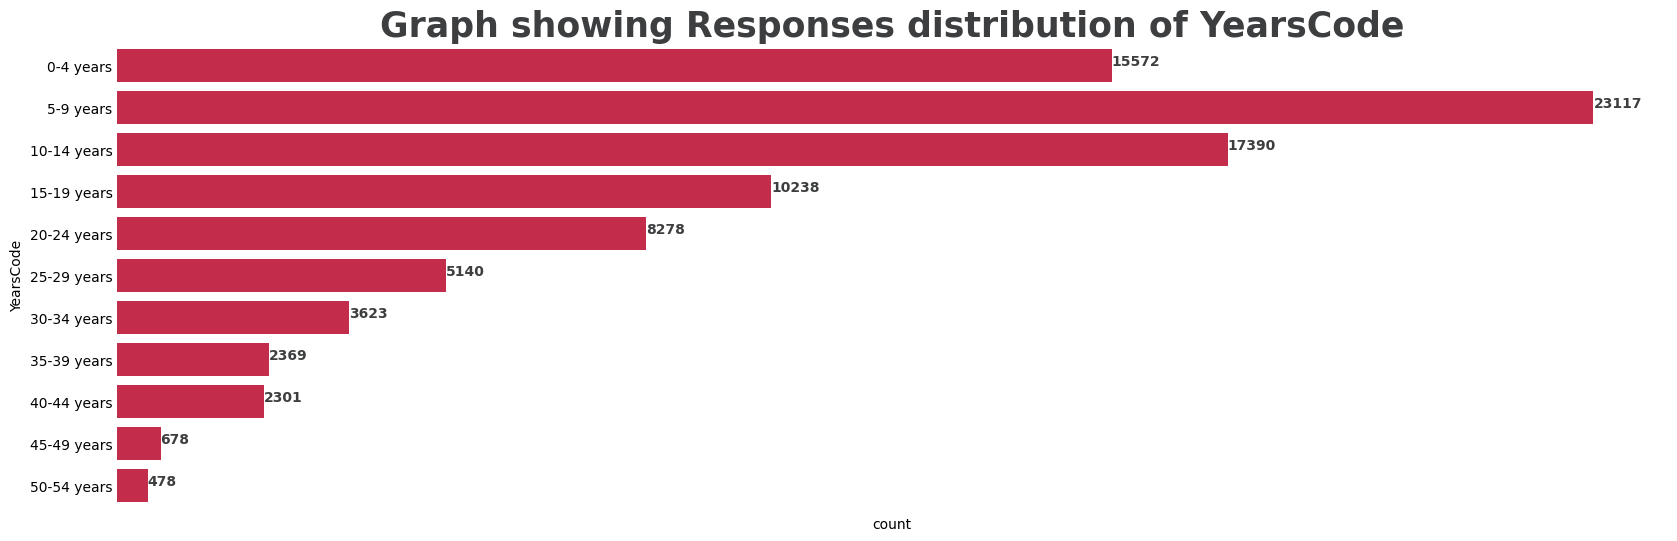

In [30]:
Univariate_Analysis(data,age_counts,'YearsCode')

---


## **YearsCodePro**

In [31]:
# Create a dictionary to map the text values to integers
text_to_int = {
    "Less than 1 year": 1,
    "More than 50 years": 50
}

# Convert the text values to integers using the dictionary
data.loc[data['YearsCodePro'].isin(text_to_int), "YearsCodePro"] = data.loc[data["YearsCodePro"].isin(text_to_int), "YearsCodePro"].map(text_to_int)

# Convert the non-text values to integers
data["YearsCodePro"] = data["YearsCodePro"].fillna(0).astype(int)


In [32]:
ages = data['YearsCodePro']

# Define bin edges
bin_edges = list(range(0, 56, 5))  # Adjusted to include upper bounds

# Define bin labels
bin_labels = [f"{i}-{i+4} years" for i in range(0, 55, 5)]  # Adjusted to have one less label

# Cut the ages into bins
age_bins = pd.cut(ages, bins=bin_edges, labels=bin_labels, right=False)

# Count occurrences within each bin
age_counts = age_bins.value_counts().sort_index().reset_index()
age_counts


,YearsCodePro,count
0,0-4 years,40292
1,5-9 years,17545
2,10-14 years,11951
3,15-19 years,7074
4,20-24 years,5435
5,25-29 years,3059
6,30-34 years,1845
7,35-39 years,1075
8,40-44 years,598
9,45-49 years,203


This the graph of YearsCodePro, We got 89184 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


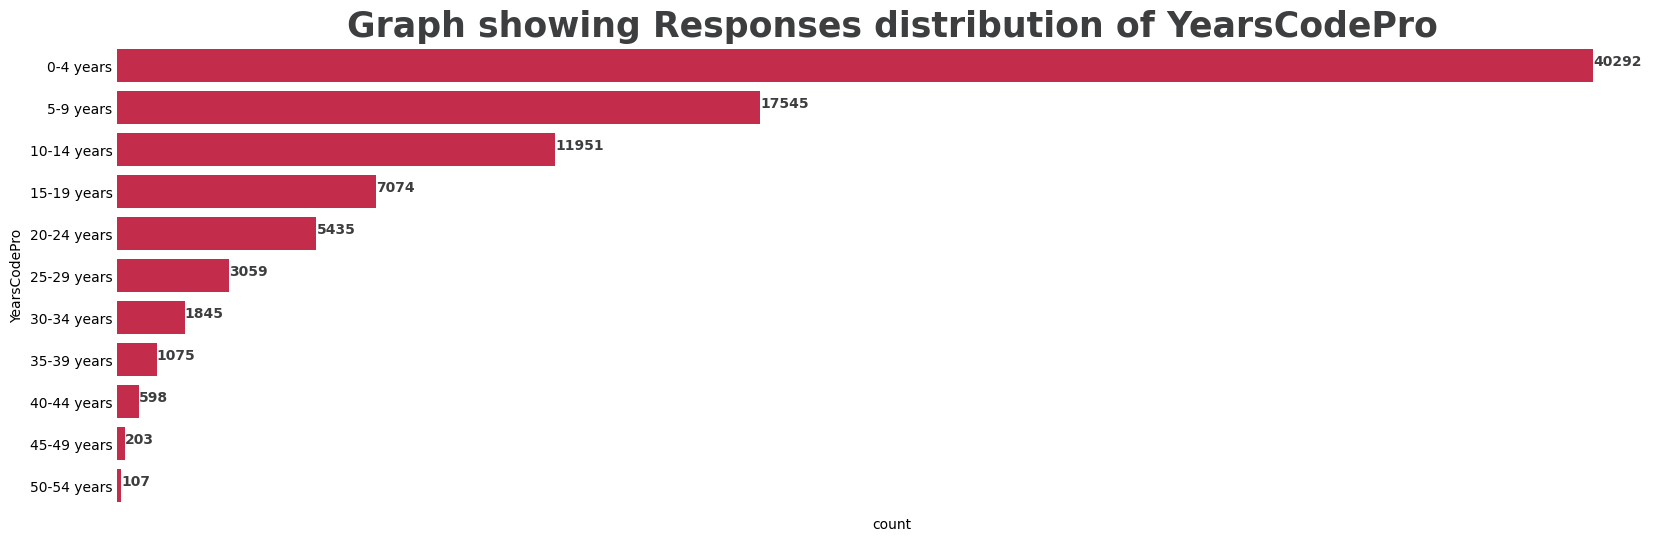

In [33]:
Univariate_Analysis(data,age_counts,'YearsCodePro')

---


## **Dev Type**

In [34]:
dev_type = data['DevType'].value_counts().reset_index()
dev_type

,DevType,count
0,"Developer, full-stack",25735
1,"Developer, back-end",13745
2,"Developer, front-end",5071
3,"Developer, desktop or enterprise applications",3904
4,Other (please specify):,3080
5,"Developer, mobile",2597
6,Engineering manager,2033
7,Student,1996
8,"Developer, embedded applications or devices",1845
9,Data scientist or machine learning specialist,1588


This the graph of DevType, We got 76872 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


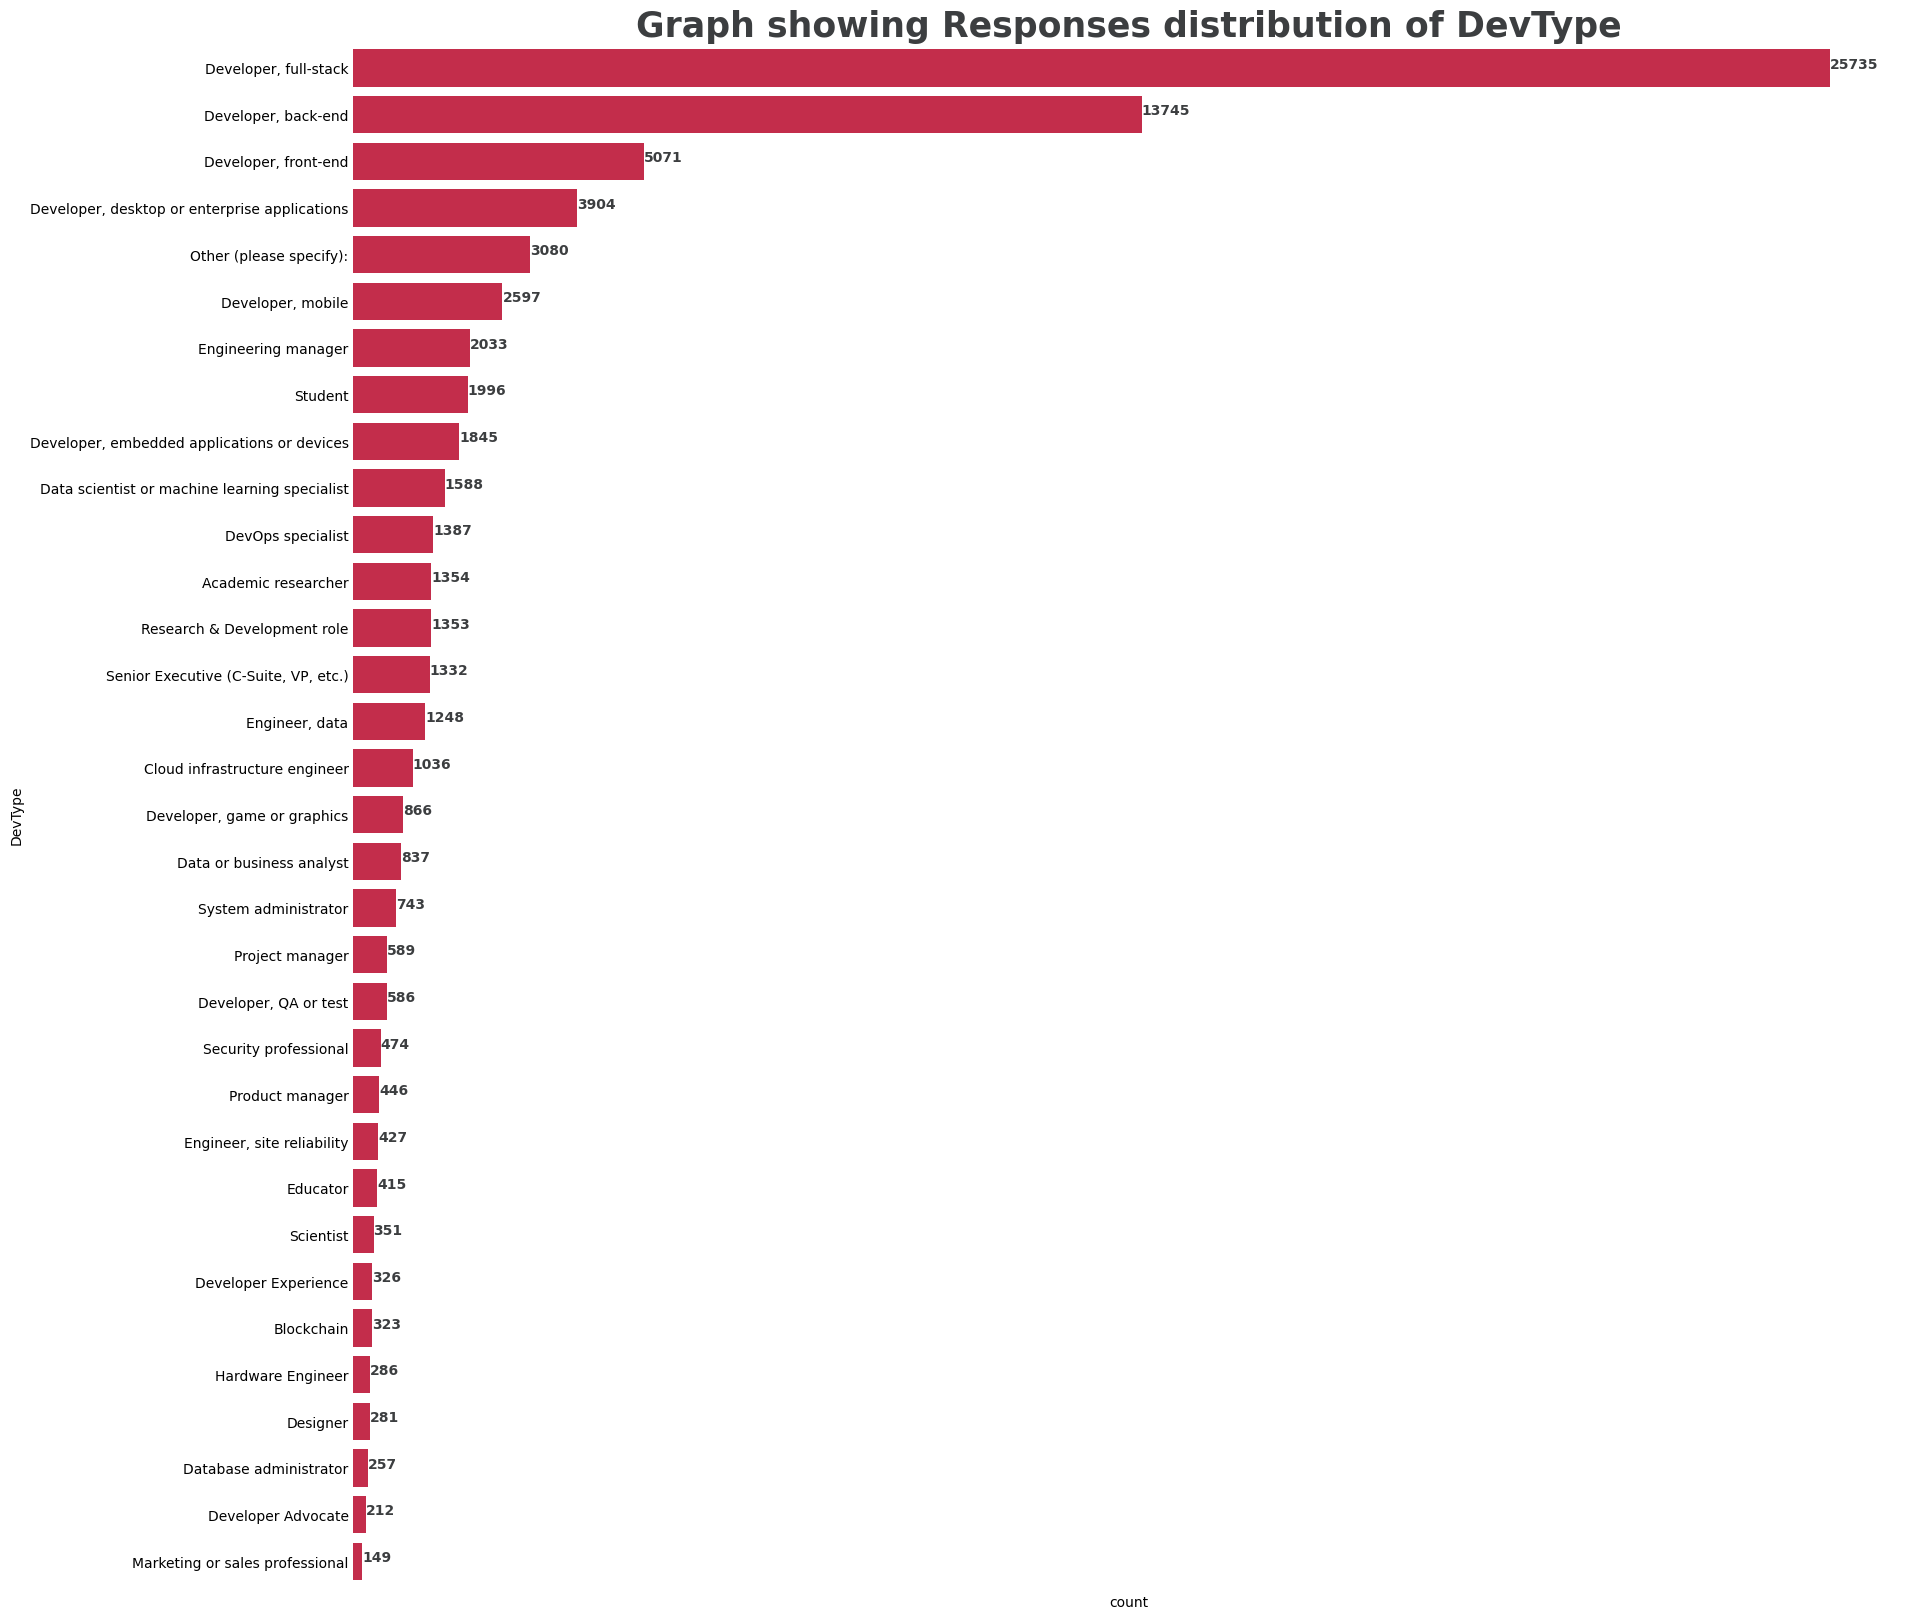

In [35]:
Univariate_Analysis(data,dev_type,'DevType',fig_size=(20,20))

---

## **Orgsize**

In [36]:
org_size =data['OrgSize'].value_counts().reset_index()
org_size

,OrgSize,count
0,20 to 99 employees,13380
1,100 to 499 employees,12218
2,"10,000 or more employees",7929
3,"1,000 to 4,999 employees",7235
4,2 to 9 employees,6439
5,10 to 19 employees,5254
6,500 to 999 employees,4472
7,"Just me - I am a freelancer, sole proprietor, ...",4196
8,"5,000 to 9,999 employees",2677
9,I don’t know,1243


This the graph of OrgSize, We got 65043 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


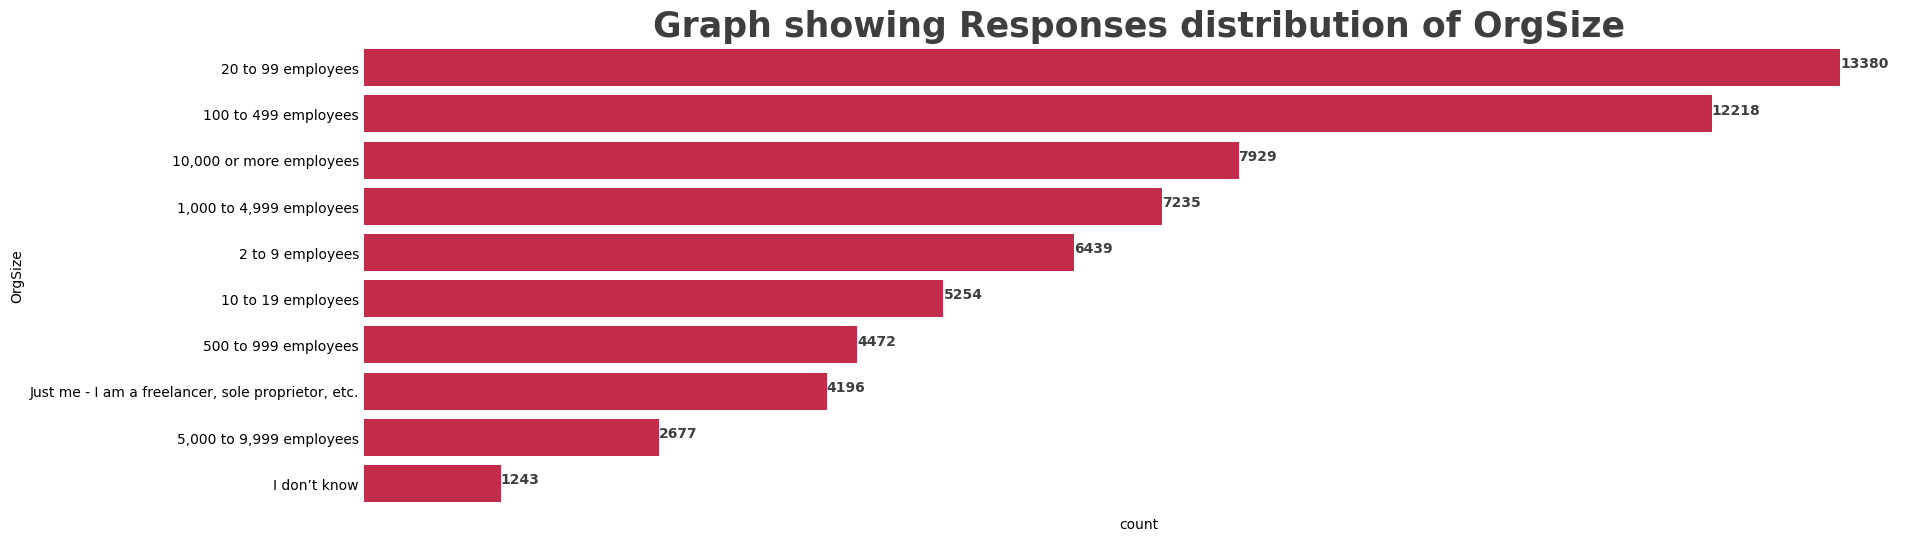

In [37]:
Univariate_Analysis(data,org_size,'OrgSize')

---

In [38]:
country = data['Country'].value_counts().reset_index()
country
top_10_countries = country.head(10)
top_10_countries

,Country,count
0,United States of America,18647
1,Germany,7328
2,India,5625
3,United Kingdom of Great Britain and Northern I...,5552
4,Canada,3507
5,France,2933
6,Poland,2435
7,Netherlands,2383
8,Australia,2078
9,Brazil,2042


C:\Users\uppada satwik\AppData\Local\Temp\ipykernel_20036\3794905159.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['percentage'] = round((dataframe['count'] / total_count) * 100, 2)


This the graph of Country, We got 87973 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


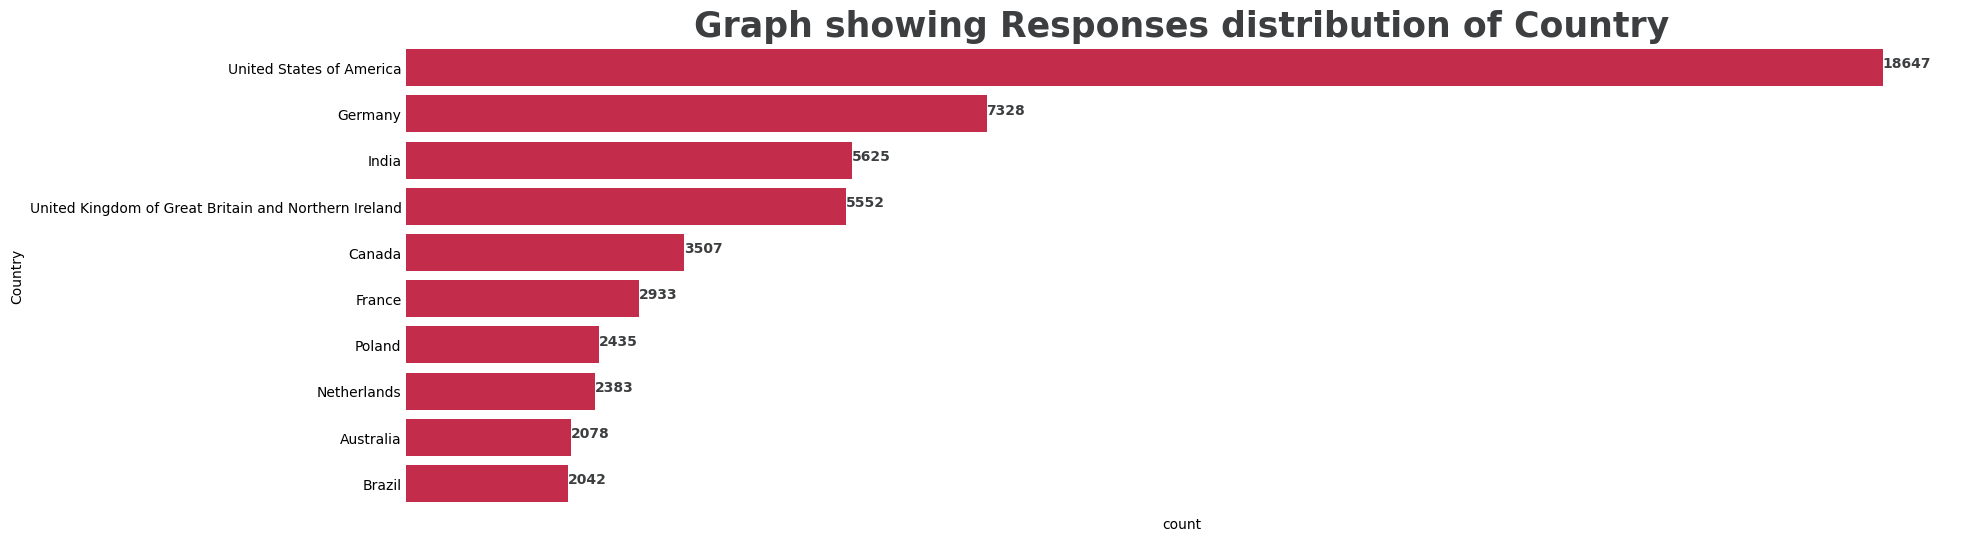

In [39]:
Univariate_Analysis(data,top_10_countries,'Country')

---

In [46]:
data['Language_worked_with'] = data['LanguageHaveWorkedWith'].str.split(';').apply(lambda x: x if isinstance(x, list) else [])
df_exploded = data.explode('Language_worked_with')
# Remove NaN values
df_exploded = df_exploded.dropna(subset=['Language_worked_with'])

# Count the occurrences of each search engi
Language_worked_with_counts = df_exploded['Language_worked_with'].value_counts().reset_index()
Language_worked_with_counts.columns = ['LanguageHaveWorkedWith', 'count']
Language_worked_with_counts

,LanguageHaveWorkedWith,count
0,JavaScript,55711
1,HTML/CSS,46396
2,Python,43158
3,SQL,42623
4,TypeScript,34041
5,Bash/Shell (all shells),28351
6,Java,26757
7,C#,24193
8,C++,19634
9,C,16940


This the graph of LanguageHaveWorkedWith, We got 87140 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


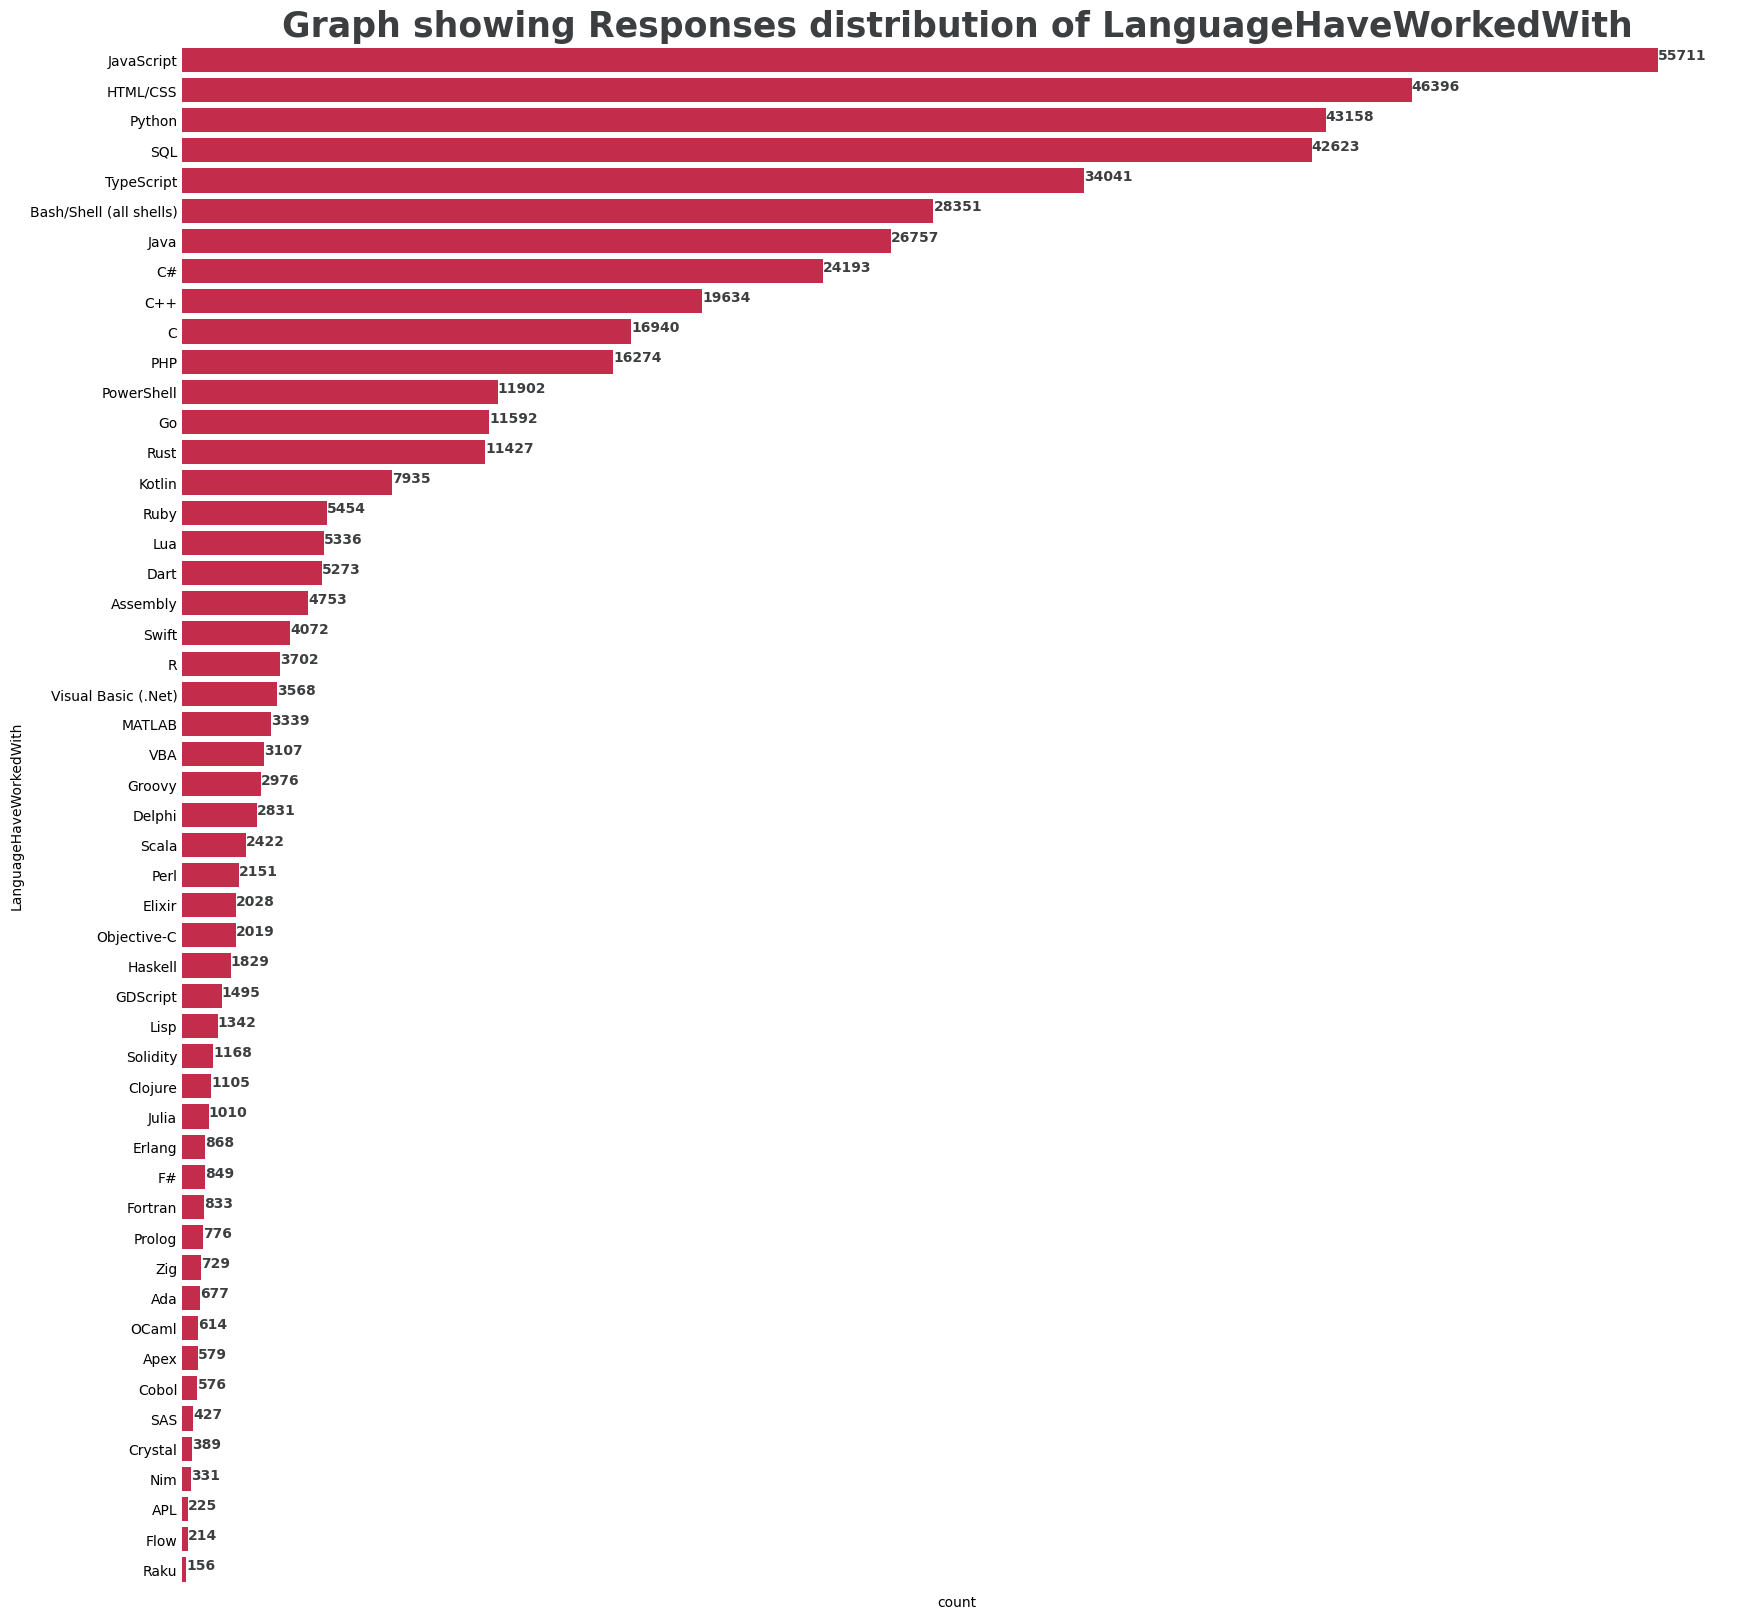

In [50]:
Univariate_Analysis(data,Language_worked_with_counts,'LanguageHaveWorkedWith',fig_size=(20,20))

---

In [51]:
data.columns

Index(['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities',
       'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysPersonal use', 'OpSysProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith',
       'AISearchHaveWorkedWith', 'AISearchWantToWorkWith',
       'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'WorkExp',
       'ProfessionalTech', 'Industry', 'ConvertedCompYearly', 'EmploymentType',
       'Codin

In [57]:
data['Language_want_work_with'] = data['LanguageWantToWorkWith'].str.split(';').apply(lambda x: x if isinstance(x, list) else [])
df_exploded = data.explode('Language_want_work_with')
# Remove NaN values
df_exploded = df_exploded.dropna(subset=['Language_want_work_with'])

# Count the occurrences of each search engi
Language_want_work_with_counts = df_exploded['Language_want_work_with'].value_counts().reset_index()
Language_want_work_with_counts.columns = ['LanguageWantToWorkWith', 'count']
Language_want_work_with_counts

,LanguageWantToWorkWith,count
0,JavaScript,34986
1,Python,34715
2,TypeScript,32256
3,HTML/CSS,29928
4,SQL,29598
5,Rust,26710
6,C#,18593
7,Bash/Shell (all shells),18279
8,Go,17993
9,Java,14384


This the graph of LanguageWantToWorkWith, We got 80709 response out of 89184
Based on these responses
Choose the option: 
          1) Percentages
          2) Responses
          


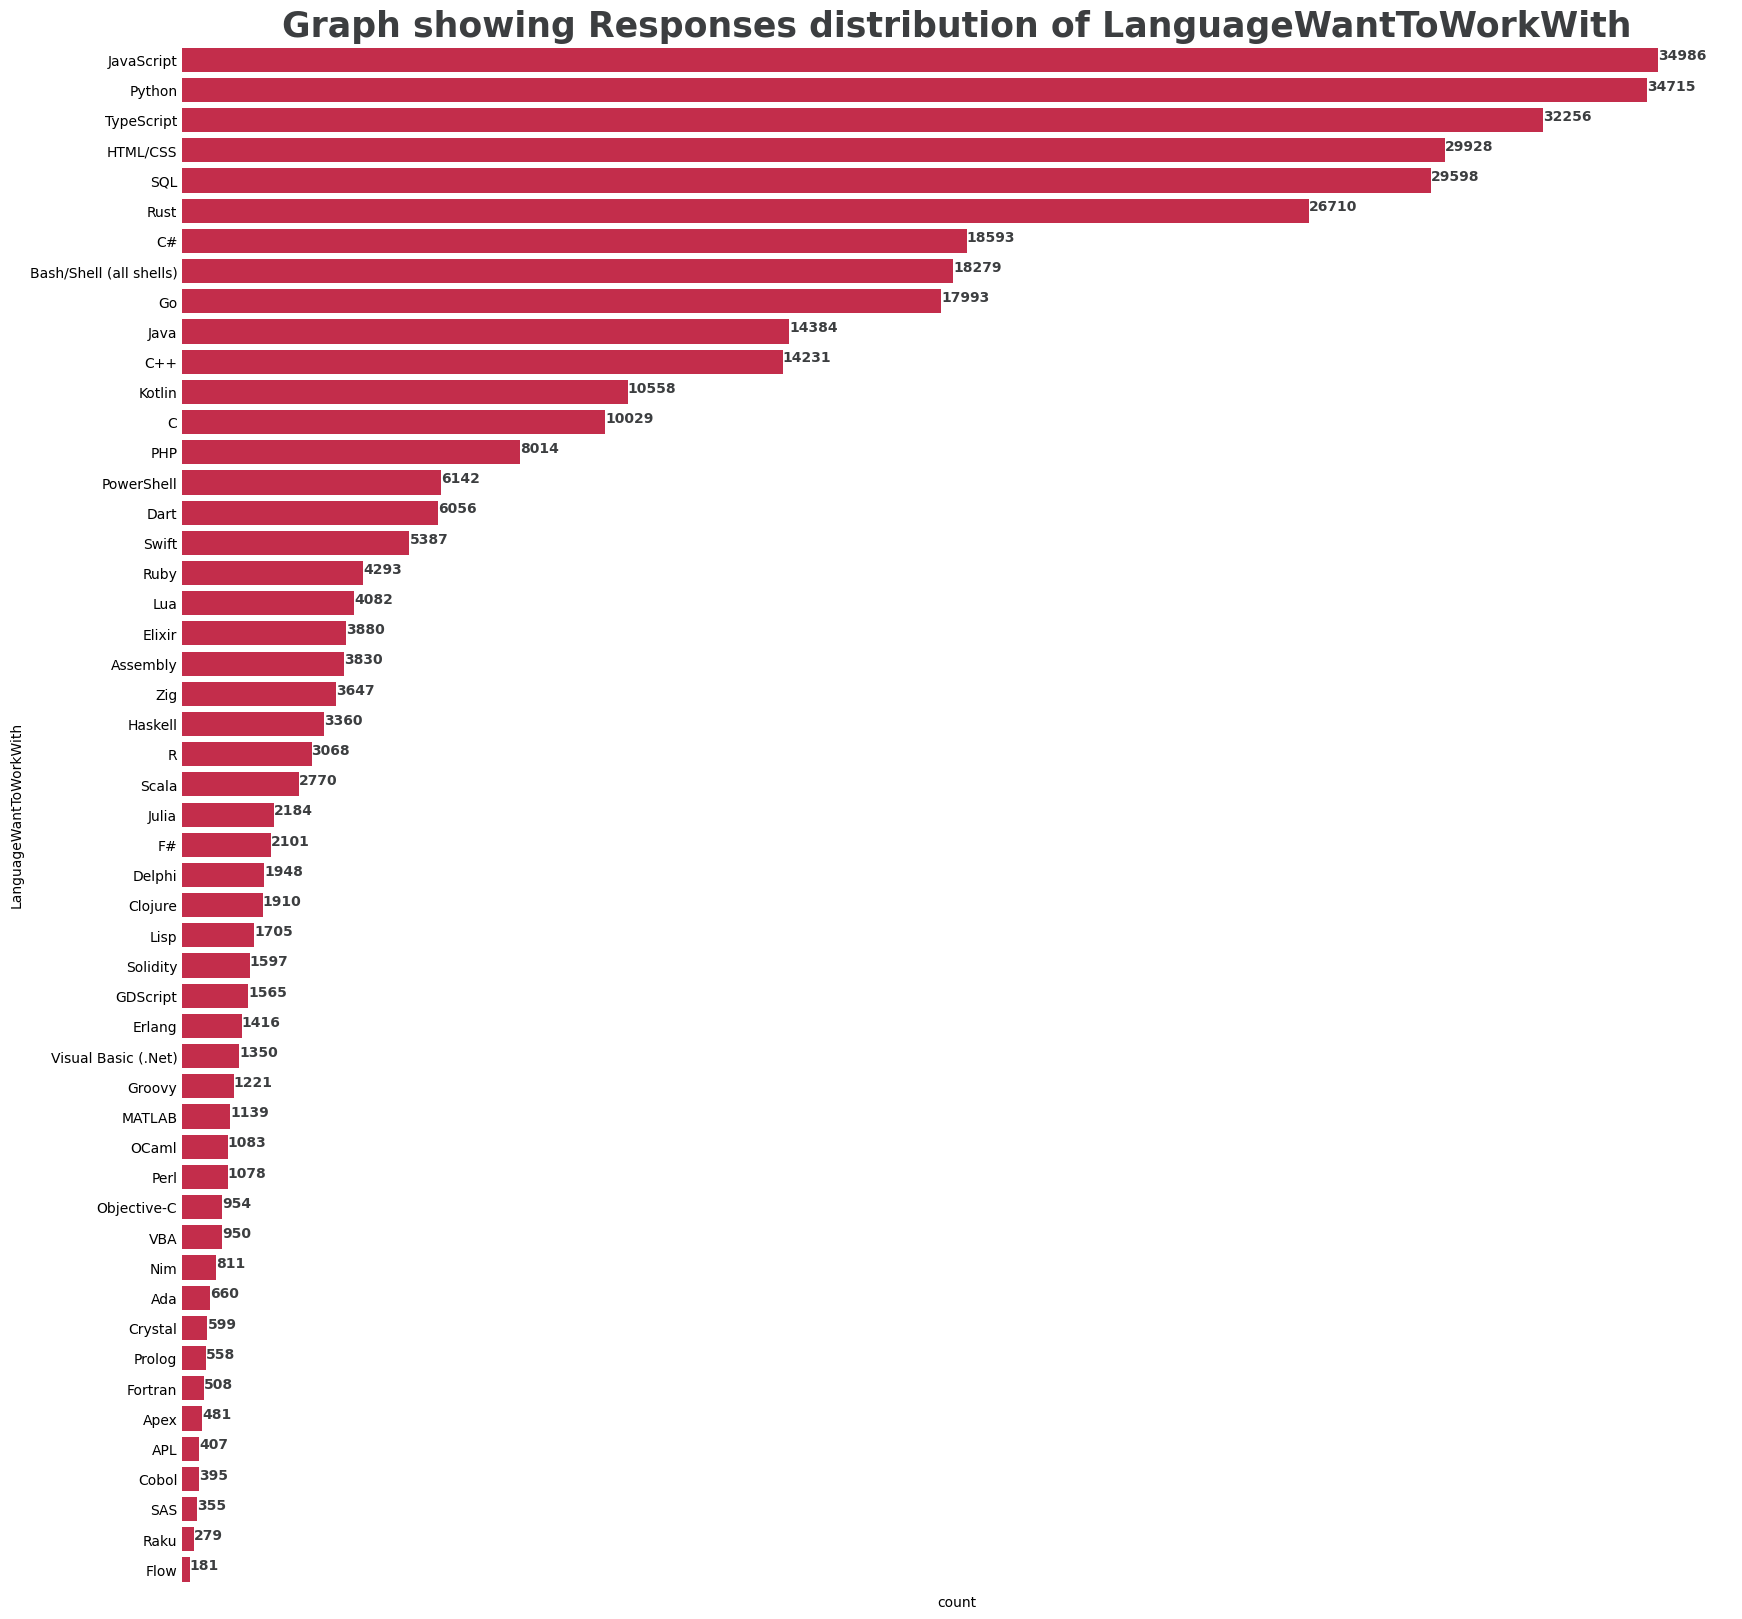

In [58]:
Univariate_Analysis(data,Language_want_work_with_counts,'LanguageWantToWorkWith',fig_size=(20,20))

---

In [40]:
data['AISearchHaveWorkedWith']

0                                 NaN
1                             ChatGPT
2                                 NaN
3                                 NaN
4                             ChatGPT
                     ...             
89179                         ChatGPT
89180                         ChatGPT
89181               ChatGPT;Quora Poe
89182    Bing AI;ChatGPT;WolframAlpha
89183                         ChatGPT
Name: AISearchHaveWorkedWith, Length: 89184, dtype: object

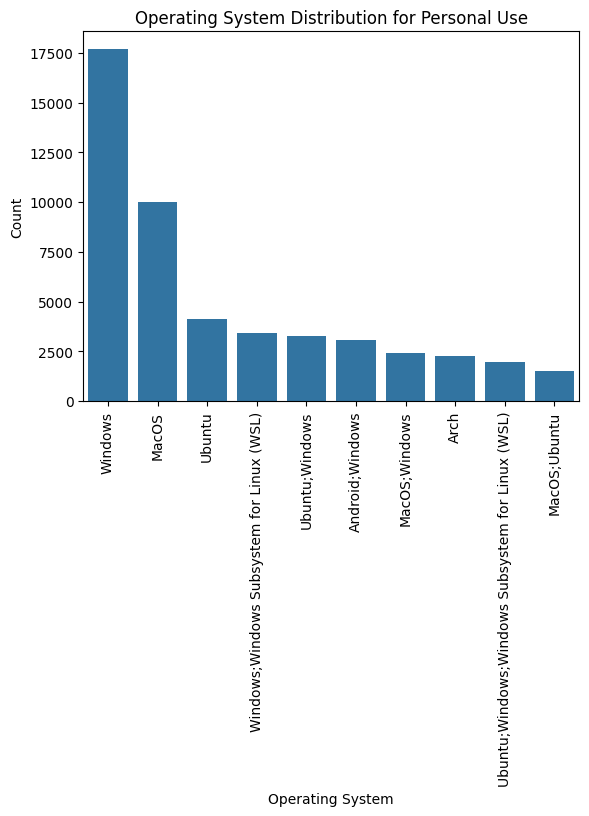

In [41]:
import seaborn as sb
import matplotlib.pyplot as plt
df=data['OpSysPersonal use'].value_counts().reset_index().head(10)
sb.barplot(x=df['OpSysPersonal use'],y = df['count'])
plt.xlabel('Operating System')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Operating System Distribution for Personal Use')
plt.show()

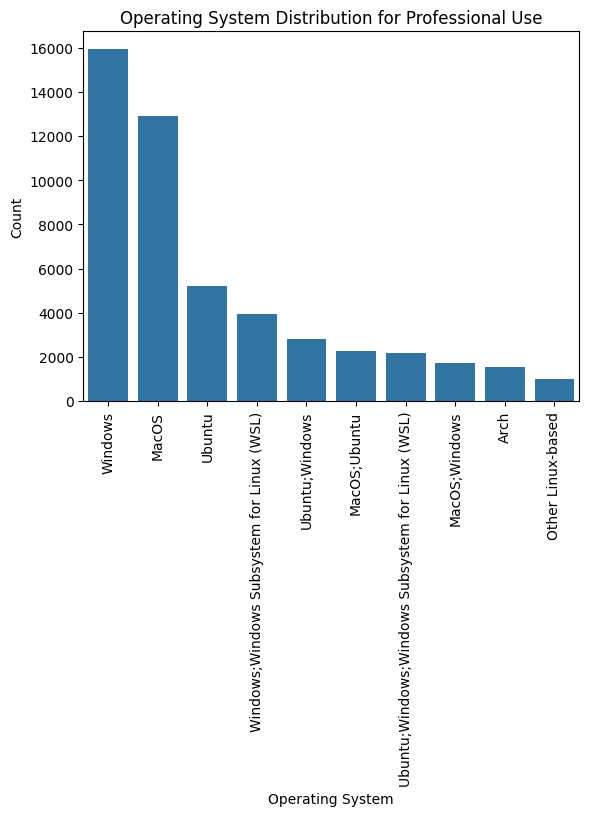

In [42]:
import seaborn as sb
import matplotlib.pyplot as plt
df=data['OpSysProfessional use'].value_counts().reset_index().head(10)
sb.barplot(x=df['OpSysProfessional use'],y = df['count'])
plt.xlabel('Operating System')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Operating System Distribution for Professional Use')
plt.show()

In [ ]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X


X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X


y_pred = regressor.predict(X)
y_pred


Model Performance Evaluation

1. Linear Regression:
Mean Squared Error (MSE): 46082.71
Description: Linear regression model's performance in predicting developer salaries.

2. Decision Tree:
Mean Squared Error (MSE): $33,748.85
Description: Evaluation of decision tree algorithm's accuracy in salary prediction.

3. Random Forest:
Mean Squared Error (MSE): $33,818.22
Description: Assessment of random forest model's performance in predicting developer salaries.

4. GridSearchCV:
Mean Squared Error (MSE): $34,647.64
Description: GridSearchCV algorithm's MSE score, indicating its predictive accuracy in salary estimation.

Best Performing Model:

Decision Tree:
Mean Squared Error (MSE): $33,748.85
Description: The decision tree algorithm exhibited the highest accuracy among all models, 
making it the preferred choice for predicting developer salaries.

In [ ]:

import pickle
data = {"model": regressor, "le_country": le_country, "le_education":
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
y_pred = regressor_loaded.predict(X)
y_pred
